### Integração numérica de fluxos (tempo contínuo)

Ao final da década de 50, um meteorologista do MIT, chamado Edward Lorenz, adquiriu um computador com 16KB de memória interna, com capacidade de realizar 60 multiplicações por segundo!!

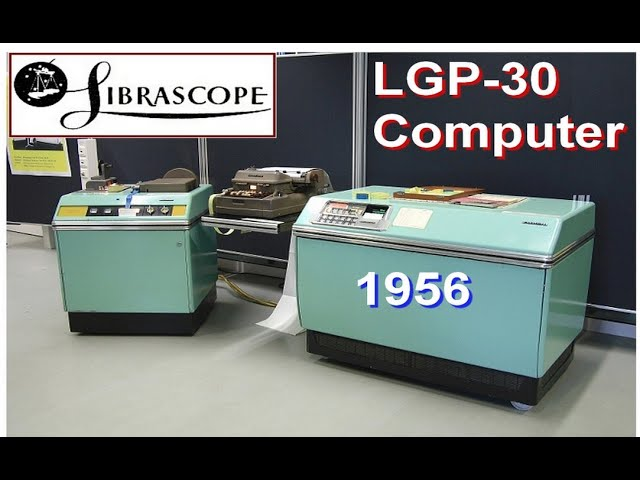 

Lorenz possuia um modelo em miniatura da atmosfera, e colocou esse computador para calcular soluções aproximadas para as 12 equações deste modelo.

Para agilizar a gravação dos resultados, Lorenz pediu para o computador imprimir apenas três algarismos significativos da sua solução, apesar da máquina trabalhar, internamente, com muitos mais dígitos.

Ao obter uma simulação completa interessante, Lorenz colocou o valor da condição inicial, com apenas três significativos, novamente para rodar no computador. E obteve um resultado completamente diferente!!!

### O Sistema de Lorenz

Lorenz então trabalhou por mais de 20 anos sem conseguir reduzir o tamanho de seu sistema, até que após colaboração com Barry Saltzman chegou a um sistema de três equações diferenciais, o famoso sistema de lorenz:

$$
\begin{array}{ll}
    \dfrac{dx}{dt} = -\sigma x + \sigma y \\
    \dfrac{dy}{dt} = -xz +rx - y \\
    \dfrac{dz}{dt} = xy - bz
\end{array}
$$

onde $\sigma$ é o número de Pandtl ($\sigma = 10$ líquidos, $\sigma = 5$ água, $\sigma = 1$ ar); $r$ é proporcional à diferença de temperatura no sistema e $b$ depende da dimensão do sistema.

As variáveis do sistema nada tem a ver com coordenadas espaciais, mas sim com: 

- $x$ proporcional à convecção no meio;
- $y$ proporcional à diferença de temperatura entre as correntes ascendentes e descendentes;
- $z$ proporcional à distorção do perfil vertical da temperatura em relação ao linear ($z = 0$ a temperatura decresce linearmente)

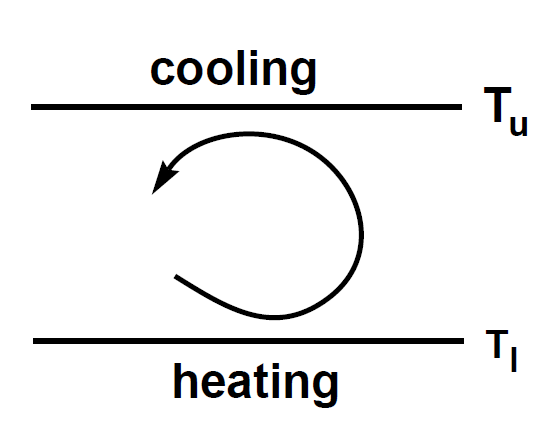

Perceba como a evolução computacional está diretamente ligada a emergência da descoberta de sensibilidade às condições iniciais, que é uma das condições para a existência de **caos**

Para integrar sistemas contínuos, a função `trajectory` do pacote DynamicalSystems.jl é ideal, pois escolhe, dentre os métodos pré-implementados, qual o melhor para integrar o sistema de equações diferenciais que é fornecido.

Vamos testar integrar o sistema de Lorenz abaixo:

In [4]:
using DynamicalSystems
using Plots


(process:12976): GLib-GIO-WARNING **: 09:54:10.374: Unexpectedly, UWP app `6760NGPDFLab.PDFX_1.3.18.0_x64__sbe4t8mqwq93a' (AUMId `6760NGPDFLab.PDFX_sbe4t8mqwq93a!App') supports 32 extensions but has no verbs


In [14]:
sis_lorenz = Systems.lorenz(;σ = 10.0, ρ = 28.0, β = 8/3)

3-dimensional continuous dynamical system
 state:       [0.0, 10.0, 0.0]
 rule f:      loop
 in-place?    false
 jacobian:    loop_jac
 parameters:  [10.0, 28.0, 2.66667]

In [21]:
tr_lorenz = trajectory(sis_lorenz, 100.0; Δt = 0.01, Ttr = 1000)

3-dimensional Dataset{Float64} with 10001 points
  6.41957   1.2696    30.7422
  5.92135   1.11106   30.0054
  5.45816   1.00699   29.275
  5.03144   0.949078  28.5551
  4.64174   0.929791  27.8484
  4.28888   0.942509  27.1566
  3.97213   0.981538  26.4811
  3.69032   1.04209   25.8224
  3.44196   1.12024   25.1809
  3.22539   1.21282   24.5566
  3.03884   1.3174    23.9494
  2.8805    1.43214   23.3593
  2.74859   1.55576   22.786
  ⋮                   
 -1.33032  -0.800353  19.8484
 -1.28477  -0.901666  19.3371
 -1.2533   -1.00512   18.8402
 -1.2348   -1.11141   18.3574
 -1.22834  -1.22131   17.8885
 -1.23316  -1.3357    17.4333
 -1.24867  -1.45554   16.9916
 -1.27441  -1.58186   16.5634
 -1.31008  -1.71578   16.1486
 -1.35552  -1.85848   15.7471
 -1.41069  -2.01123   15.3591
 -1.47568  -2.17537   14.9848

In [22]:
tr_lorenz = Matrix(tr_lorenz)

10001×3 Matrix{Float64}:
  6.41957   1.2696    30.7422
  5.92135   1.11106   30.0054
  5.45816   1.00699   29.275
  5.03144   0.949078  28.5551
  4.64174   0.929791  27.8484
  4.28888   0.942509  27.1566
  3.97213   0.981538  26.4811
  3.69032   1.04209   25.8224
  3.44196   1.12024   25.1809
  3.22539   1.21282   24.5566
  3.03884   1.3174    23.9494
  2.8805    1.43214   23.3593
  2.74859   1.55576   22.786
  ⋮                   
 -1.33032  -0.800353  19.8484
 -1.28477  -0.901666  19.3371
 -1.2533   -1.00512   18.8402
 -1.2348   -1.11141   18.3574
 -1.22834  -1.22131   17.8885
 -1.23316  -1.3357    17.4333
 -1.24867  -1.45554   16.9916
 -1.27441  -1.58186   16.5634
 -1.31008  -1.71578   16.1486
 -1.35552  -1.85848   15.7471
 -1.41069  -2.01123   15.3591
 -1.47568  -2.17537   14.9848

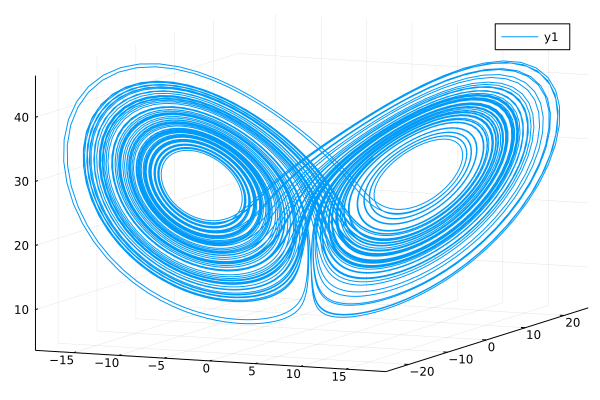

In [23]:
plot(tr_lorenz[:,1],tr_lorenz[:,2], tr_lorenz[:,3])

Fazer gif variando $r$ em um código no atom!